# Solving XOR with yadll!

In [19]:
from src.scalar.nn import * 
from src.scalar.loss import *
from src.scalar.optimizer import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split

In [20]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

y[y==2]=0
y[y==3]=1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19)


## Visualizing the data

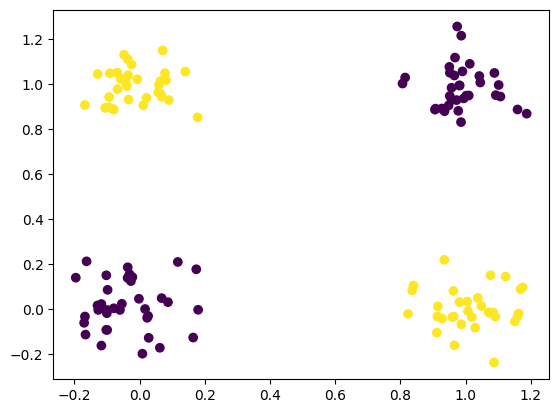

In [21]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)

## Training the model

The model sometimes converges to a local suboptimal minima. If it happens, just restart training.

In [61]:
model = Sequential(
    Layer(2,2, activation_func='relu'),
    Layer(2,1)
)
optim = SGD(model.parameters(), 0.1)

In [62]:
losses = []
N = 500
for k in range(N):
    ypred = [model(x)[0] for x in x_train]
    loss = MSE(ypred, y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.data)
    if k % 100 == 0:
        print(f"iteration {k}, loss: {loss.data}")

iteration 0, loss: 0.8607566356658936
iteration 100, loss: 0.09828780591487885
iteration 200, loss: 0.02588910423219204
iteration 300, loss: 0.012403178960084915
iteration 400, loss: 0.010217701084911823


## Visualizing the decision region

(-1.2371258735656738, 2.012874126434326)

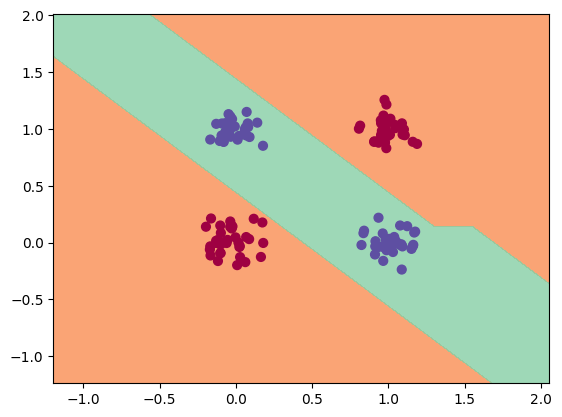

In [63]:
h = 0.25
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Scalar, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s[0].data > 0.5 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Comparing with Pytorch

The model sometimes converges to a local suboptimal minima. If it happens, just restart training.

In [64]:
import torch

In [38]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [55]:
torch_model = torch.nn.Sequential(
    torch.nn.Linear(2,2),
    torch.nn.ReLU(),
    torch.nn.Linear(2,1)
)
optim = torch.optim.SGD(torch_model.parameters(), lr=0.1, momentum=0)
loss_fn = torch.nn.MSELoss()

In [56]:
for k in range(500):
    ypred = torch_model(x_train)
    loss = loss_fn(ypred, y_train.reshape((-1,1)))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if k % 100 == 0:
        print(f"iteration {k}, loss: {loss.data}")

iteration 0, loss: 0.45656025409698486
iteration 100, loss: 0.11982601881027222
iteration 200, loss: 0.03289489448070526
iteration 300, loss: 0.013560403138399124
iteration 400, loss: 0.01057873759418726
